In [ ]:
!pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 8.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm

In [ ]:
df = pd.read_csv("air traffic.csv")

df["Date"] = pd.to_datetime(df["Year"].astype(str) + "-" + df["Month"].astype(str))
df = df.set_index("Date")

s = df["Pax"].str.replace(",", "").astype(int)


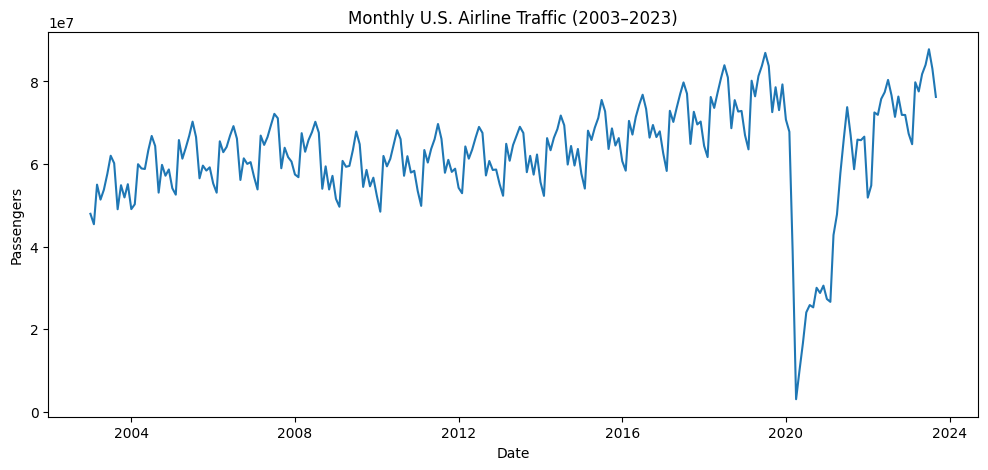

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(s)
plt.title("Monthly U.S. Airline Traffic (2003–2023)")
plt.ylabel("Passengers")
plt.xlabel("Date")
plt.show()

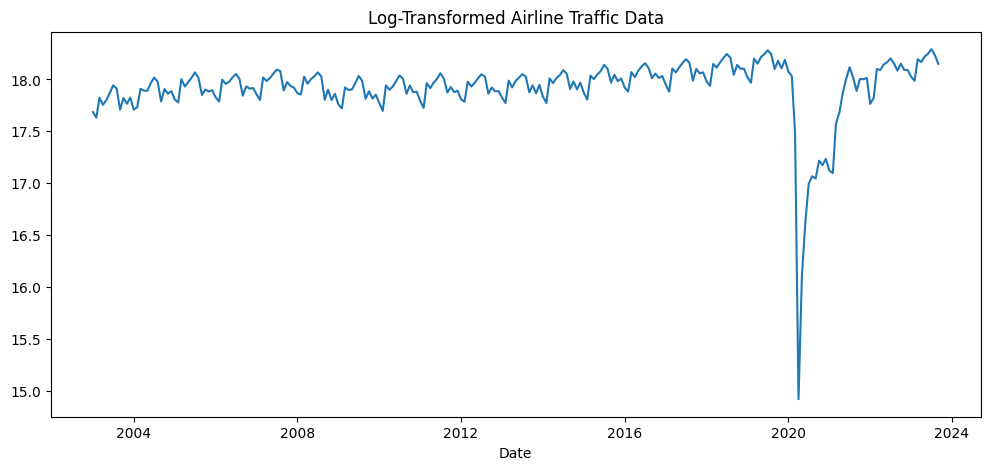

In [ ]:
# Log Transform
log_s = np.log(s)

plt.figure(figsize=(12,5))
plt.plot(log_s)
plt.title("Log-Transformed Airline Traffic Data")
plt.xlabel("Date")
plt.show()

In [ ]:
# AUTO ARIMA (SARIMA)
model = pm.auto_arima(
    log_s,
    start_p=1, start_q=1,
    max_p=3, max_q=3,
    m=12,  # monthly seasonality
    start_P=0,
    seasonal=True,
    test='adf',
    d=None,
    D=None,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=-86.039, Time=2.61 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-62.592, Time=0.20 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-66.717, Time=0.59 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-66.590, Time=0.98 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-64.572, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=-80.942, Time=0.80 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=-95.117, Time=5.00 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=-87.090, Time=1.11 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=-89.279, Time=2.68 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=-95.746, Time=4.48 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=-86.715, Time=3.43 sec
 ARIMA(1,1,1)(2,0,2)[12] intercept   : AIC=inf, Time=2.52 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=4.65 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=inf, Time=2.71 sec
 ARIMA(2,1,1)(1,0,2)[12] intercept   : AIC=-9

In [ ]:
print(model.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  249
Model:             SARIMAX(2, 1, 1)x(1, 0, [1, 2], 12)   Log Likelihood                  56.438
Date:                                 Sat, 15 Nov 2025   AIC                            -96.877
Time:                                         23:48:23   BIC                            -68.770
Sample:                                     01-01-2003   HQIC                           -85.562
                                          - 09-01-2023                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0001      0.001      0.164      0.869      -0.001       0

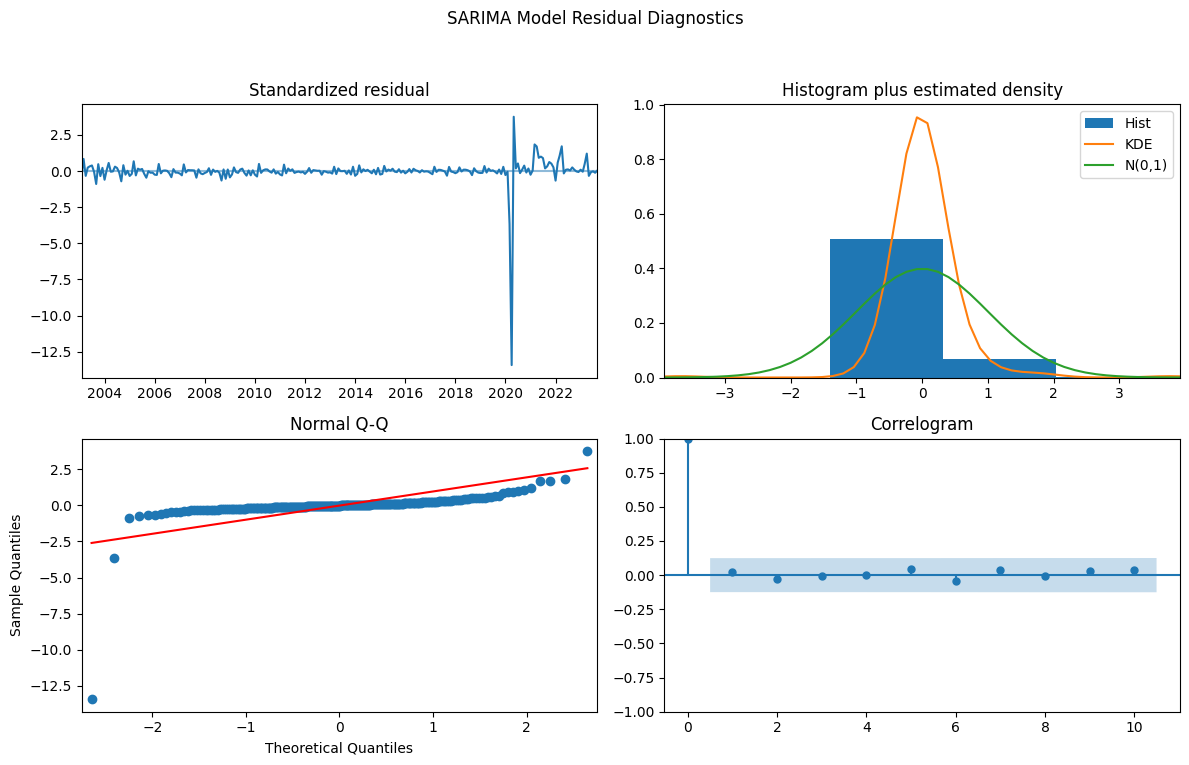

In [ ]:
# Diagnostic Plots
model.plot_diagnostics(figsize=(12, 8))
plt.suptitle("SARIMA Model Residual Diagnostics")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
# Forecast
n_forecast = 24
forecast, conf_int = model.predict(
    n_periods=n_forecast,
    return_conf_int=True,
    alpha=0.05
)

forecast_index = pd.date_range(
    start=s.index[-1] + pd.DateOffset(months=1),
    periods=n_forecast,
    freq="MS"
)

In [ ]:
# Transform back from log scale
forecast_orig = np.exp(forecast)
conf_int_orig = np.exp(conf_int)


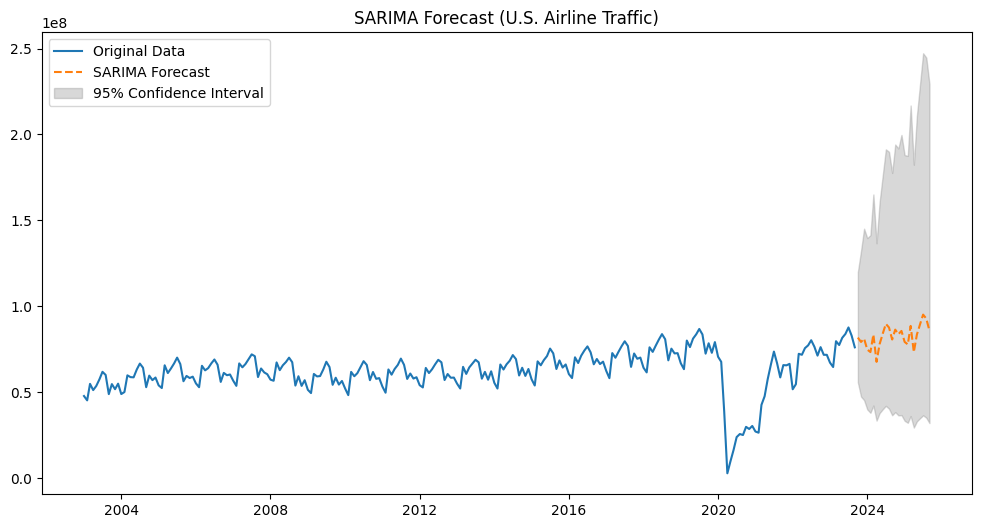

In [ ]:
# Fopecast Plot
plt.figure(figsize=(12,6))
plt.plot(s, label="Original Data")
plt.plot(forecast_index, forecast_orig, label="SARIMA Forecast", linestyle="--")
plt.fill_between(
    forecast_index,
    conf_int_orig[:, 0],
    conf_int_orig[:, 1],
    color="gray",
    alpha=0.3,
    label="95% Confidence Interval"
)
plt.title("SARIMA Forecast (U.S. Airline Traffic)")
plt.legend()
plt.show()